In [120]:
import pandas as pd

df = pd.read_csv('C:/Users/priyanka_sati/Documents/anaconda/Pune_Temp.csv')
#df.set_index('DATE', inplace=True)
df.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,IN012190100,"POONA, IN",2009-01-01,NaN,66,88.0,49.0
1,IN012190100,"POONA, IN",2009-01-02,NaN,69,87.0,50.0
2,IN012190100,"POONA, IN",2009-01-03,NaN,70,86.0,55.0
3,IN012190100,"POONA, IN",2009-01-04,NaN,69,86.0,55.0
4,IN012190100,"POONA, IN",2009-01-05,NaN,69,86.0,55.0


In [121]:
df.drop(['NAME','STATION'],inplace=True,axis=1)

In [122]:
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN
0,2009-01-01,NaN,66,88.0,49.0
1,2009-01-02,NaN,69,87.0,50.0
2,2009-01-03,NaN,70,86.0,55.0
3,2009-01-04,NaN,69,86.0,55.0
4,2009-01-05,NaN,69,86.0,55.0


In [79]:
df.shape
df.describe()

,PRCP,TAVG,TMAX,TMIN
count,1105.000000,3718.000000,2481.000000,2951.000000
mean,0.235756,76.416622,89.664651,64.599797
std,0.550899,6.145086,6.660276,8.543336
min,0.000000,58.000000,66.000000,40.000000
25%,0.000000,73.000000,85.000000,57.000000
50%,0.040000,76.000000,88.000000,67.000000
75%,0.200000,80.000000,94.000000,72.000000
max,7.130000,92.000000,107.000000,80.000000


In [125]:
df.isna().sum()

DATE    0
PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

In [124]:
df.fillna(df.mean(),inplace=True)
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN
0,2009-01-01,0.235756,66,88.0,49.0
1,2009-01-02,0.235756,69,87.0,50.0
2,2009-01-03,0.235756,70,86.0,55.0
3,2009-01-04,0.235756,69,86.0,55.0
4,2009-01-05,0.235756,69,86.0,55.0


In [8]:
df.set_index('DATE', inplace=True)
df.head()

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2009-01-01,0.235756,66,88.0,49.0
2009-01-02,0.235756,69,87.0,50.0
2009-01-03,0.235756,70,86.0,55.0
2009-01-04,0.235756,69,86.0,55.0
2009-01-05,0.235756,69,86.0,55.0


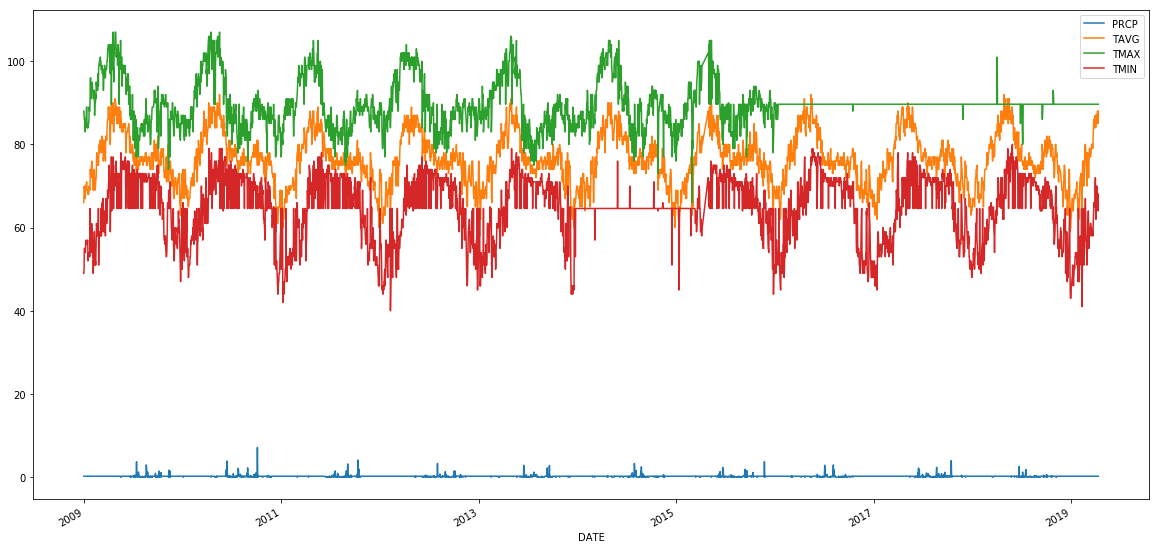

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df.plot(figsize=(20,10)) 


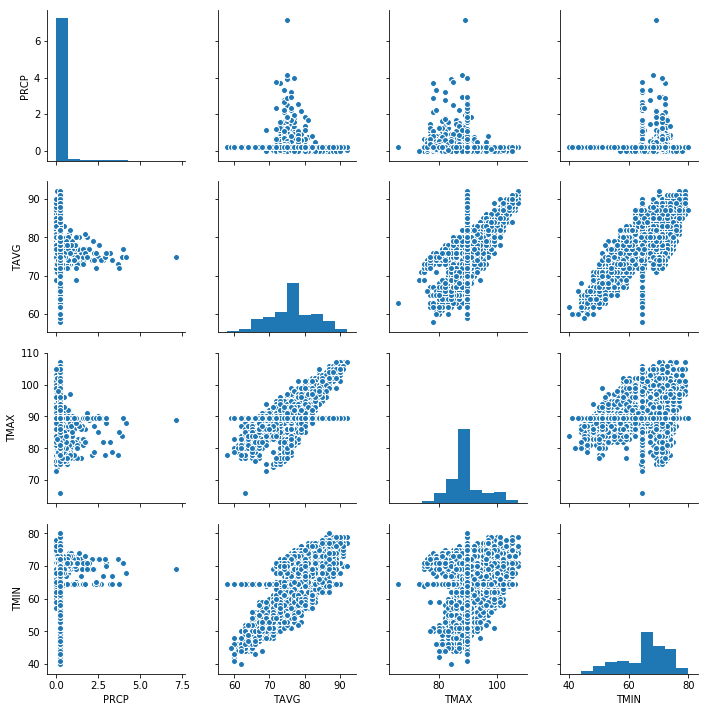

In [33]:
sns.pairplot(df)

In [126]:
df['DATE'] = df['DATE'].apply(lambda x: x.split()[0].replace('-', ''))

In [127]:
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN
0,20090101,0.235756,66,88.0,49.0
1,20090102,0.235756,69,87.0,50.0
2,20090103,0.235756,70,86.0,55.0
3,20090104,0.235756,69,86.0,55.0
4,20090105,0.235756,69,86.0,55.0


In [128]:
import numpy as np

Y=np.array(df['TMAX'])
x=df.drop('TMAX',axis=1)
X_list = list(df.columns)
X=np.array(x)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [129]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2788, 4)
Training Labels Shape: (2788,)
Testing Features Shape: (930, 4)
Testing Labels Shape: (930,)


In [130]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, X_list.index('TAVG')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  13.02


In [131]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [132]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.21 degrees.


In [133]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.64 %.


In [134]:
from sklearn.metrics import accuracy_score
print(rf.score(test_features,test_labels))

0.8727324470357964


In [53]:
test_features[:,2]

array([70.        , 51.        , 60.        , 71.        , 76.        ,
       72.        , 57.        , 57.        , 69.        , 77.        ,
       71.        , 71.        , 50.        , 53.        , 77.        ,
       71.        , 64.59979668, 68.        , 64.59979668, 70.        ,
       69.        , 66.        , 57.        , 52.        , 64.59979668,
       73.        , 64.59979668, 73.        , 62.        , 64.59979668,
       62.        , 76.        , 71.        , 64.59979668, 64.59979668,
       61.        , 73.        , 64.59979668, 64.59979668, 64.59979668,
       65.        , 58.        , 64.59979668, 54.        , 71.        ,
       67.        , 64.        , 57.        , 57.        , 55.        ,
       71.        , 64.59979668, 74.        , 62.        , 75.        ,
       71.        , 71.        , 64.59979668, 64.59979668, 73.        ,
       51.        , 71.        , 51.        , 62.        , 57.        ,
       72.        , 71.        , 67.        , 64.59979668, 54.  

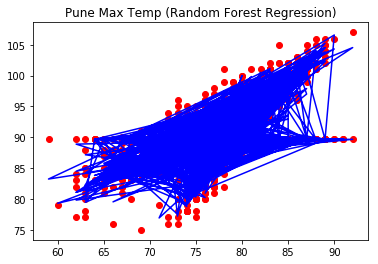

In [106]:
# Visualising the Random Forest Regression results (higher resolution)
plt.scatter(test_features[:,2], test_labels, color = 'red')#scatter and plot should use same column
plt.plot(test_features[:,2], predictions, color = 'blue')
plt.title('Pune Max Temp (Random Forest Regression)')
plt.show()

In [135]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(X_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TAVG                 Importance: 0.56
Variable: DATE                 Importance: 0.29
Variable: TMAX                 Importance: 0.11
Variable: PRCP                 Importance: 0.03


In [142]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
# List and then convert to datetime object
dates = X[:, X_list.index('DATE')]
dates = [datetime.datetime.strptime(date, '%Y%m%d') for date in dates]
#print(dates)
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': Y})


In [143]:
true_data.head()

,date,actual
0,2009-01-01,88.0
1,2009-01-02,87.0
2,2009-01-03,86.0
3,2009-01-04,86.0
4,2009-01-05,86.0


In [148]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of test values
# List and then convert to datetime object
test_dates = test_features[:, X_list.index('DATE')]
test_dates = [datetime.datetime.strptime(date, '%Y%m%d') for date in test_dates]
#print(test_dates)
# Dataframe with true values and dates
test_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
test_data.head()

,date,prediction
0,2013-09-24,85.982659
1,2017-12-24,89.664651
2,2016-03-23,89.664651
3,2011-10-10,91.823994
4,2017-06-07,89.664651


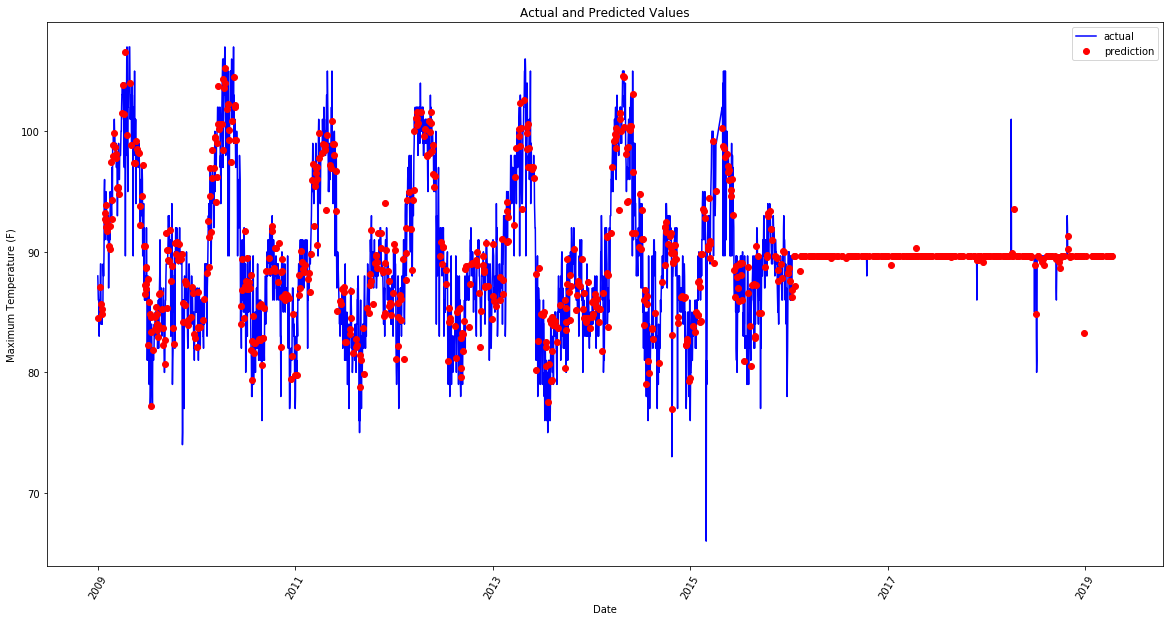

In [152]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(test_data['date'], test_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

In [155]:
print(rf.predict([['20150911', 0.31, 76, 69.0]]))#validating predictions

[84.92853164]


In [156]:
print(rf.predict([['20181105', 0.16, 80, 70]]))#validating predictions

[89.59670576]


In [157]:
print(rf.predict([['20181027', 0.00, 77, 61]]))#validating predictions

[90.6461322]


In [158]:
print(rf.predict([['20180706', 0.2, 76, 73]]))#validating predictions

[83.80937727]


In [159]:
print(rf.predict([['20190411', 0.0, 88, 68]]))#validating predictions

[89.66465135]


In [161]:
print(rf.predict([['20190418', 0.0, 88, 0]]))#validating predictions

[89.66465135]


In [162]:
print(rf.predict([['20190418', 0.0, 91.4, 66]]))#validating predictions

[90.25408948]
